# Analysis - 3

# Sentiment Analysis Of Reviews & its relationship with Price

    There are so many factors which contributes towards the price of a listing on AirBnB.
    While, we already have few conclusions for relationship between various factors and their dependency on prices of a listing,
    lets analyze if price of a listing dependent upon number of reviews and if yes, how does it varies?

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\leec\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [47]:
reviewsDF = pd.read_csv('reviews.csv')
reviewsDF = reviewsDF.drop(['Unnamed: 0'],axis=1)
reviewsDF = reviewsDF.dropna()
reviewsDF.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,city
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,Boston
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,Boston
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,Boston
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,Boston
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,Boston


To retrieve the 'sentiment' of comments - 'positive','negative' or 'neutral' I am using built-in analyzer in the NLTK Python library to assign polarity scoore to each comment.

In [48]:
#assigning polarity score to each comment and adding the same to dataframe
sid = SentimentIntensityAnalyzer()

reviewsDF['polarity_value']="Default"
reviewsDF['neg'] = 0.0
reviewsDF['pos'] = 0.0
reviewsDF['neu'] = 0.0
reviewsDF['compound'] = 0.0
for index,row in reviewsDF.iterrows():
    ss = sid.polarity_scores(row['comments'])
    reviewsDF.at[index,'polarity_value'] = ss
    reviewsDF.at[index,'neg'] = ss['neg']
    reviewsDF.at[index,'pos'] = ss['pos']
    reviewsDF.at[index,'neu'] = ss['neu']
    reviewsDF.at[index,'compound'] = ss['compound']
reviewsDF.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,city,polarity_value,neg,pos,neu,compound
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,Boston,"{'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'comp...",0.0,0.352,0.648,0.9626
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,Boston,"{'neg': 0.0, 'neu': 0.639, 'pos': 0.361, 'comp...",0.0,0.361,0.639,0.9061
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,Boston,"{'neg': 0.0, 'neu': 0.767, 'pos': 0.233, 'comp...",0.0,0.233,0.767,0.9663
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,Boston,"{'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'comp...",0.0,0.327,0.673,0.9267
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,Boston,"{'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'comp...",0.0,0.363,0.637,0.8658


In [49]:
# Our dataframe consists of reviews in different language as well.Hence removing the comments which are not in english
from langdetect import detect

def detect_lang(sente):
    sente=str(sente)
    try:
        return detect(sente)
    except:
        return "None"

In [50]:
for index,row in reviewsDF.iterrows():
    lang=detect_lang(row['comments'])
    reviewsDF.at[index,'language'] = lang
    
#taking rows whose language is English
EngReviewsDF=reviewsDF[reviewsDF.language=='en']

EngReviewsDF.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments,city,polarity_value,neg,pos,neu,compound,language
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,Boston,"{'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'comp...",0.0,0.352,0.648,0.9626,en
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,Boston,"{'neg': 0.0, 'neu': 0.639, 'pos': 0.361, 'comp...",0.0,0.361,0.639,0.9061,en


In [51]:
# Lets visualize polarity score for positivity
def get_polarDF(EngReviewsDF,polarity):
    polarDF=EngReviewsDF[[polarity]]
    polarDF=polarDF.groupby(pd.cut(polarDF[polarity], np.arange(0, 1.1, 0.1))).count()
    polarDF=polarDF.rename(columns={polarity:'count_of_Comments'})
    polarDF=polarDF.reset_index()
    polarDF=polarDF.rename(columns={polarity:'range_i'})
    if polarity == 'pos':
        s_polarity = 'positive'
    elif polarity == 'neg':
        s_polarity = 'negative'
    elif polarity == 'neu':
        s_polarity = 'neutrl'
    for i,r in polarDF.iterrows():
        polarDF.at[i,'RANGE']=float(str(r['range_i'])[1:4].replace(',',''))
        polarDF.at[i,'Sentiment']=s_polarity
    del polarDF['range_i']
    return polarDF

In [52]:
def get_polarDF_all(EngReviewsDF): 
    polarDF = get_polarDF(EngReviewsDF,'pos')
    polarDFneg = get_polarDF(EngReviewsDF,'neg')
    for i,r in polarDFneg.iterrows():
        polarDF=polarDF.append(pd.Series([r[0],r[1],r[2]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)
    polarDFnut = get_polarDF(EngReviewsDF,'neu')
    for i,r in polarDFnut.iterrows():
        polarDF=polarDF.append(pd.Series([r[0],r[1],r[2]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)   
    return polarDF         

C:\Users\leec\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x720 with 0 Axes>

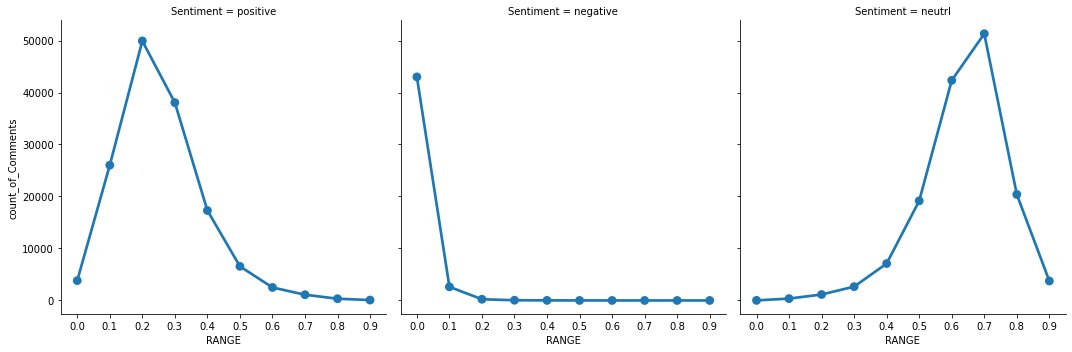

In [53]:
polarDF=get_polarDF_all(EngReviewsDF)
plt.figure(figsize=(10,10))
sns.factorplot(data=polarDF, x="RANGE", y="count_of_Comments",col="Sentiment") 

    It can be seen that Almost none of the texts are classified as having significant amounts of negativity. 
    In fact, a significant amount of them are given exactly 0.0 negativity.
    It can be clearly seen that most of the comments are neutral.
    However, a signifigant amount of comments are positive.

    We can loosely interpret number of reviews as times people have stayed in the said listing. 
    Of course, this depends on when the listing appeared, how long it appeared for, and various other factors. 
    But it could serve to be useful information to see correlation between price and number of reviews.
    Lets check if there is any relationship between number of reviews and price of listing

<AxesSubplot:xlabel='price', ylabel='number_of_reviews'>

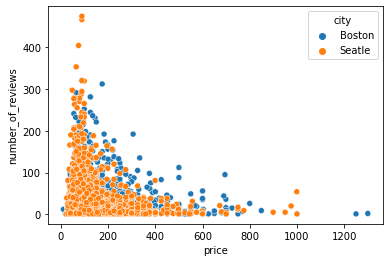

In [77]:
sns.scatterplot(x = listings['price'], y = listings['number_of_reviews'], hue=listings["city"])

    The graph shows that listings with prices that range around 100 - 400 get the most reviews, probably because they are in the most reasonable price range. 
    The number quickly declines as the price goes up.
    This indicates that more people book listings that are around $100 - 400 in prices for Boston while listings for Seatle are around $50~100.
    This shows that it is not necessary for an expensive listing to have large number of reviews.
    Heneforth there is no exact relation between Prices and Number of Reviews for a listing.